In [2]:
from pgmpy.readwrite import BIFReader

In [3]:
reader = BIFReader("data/cancer.bif")

In [4]:
model = reader.get_model()

In [5]:
for left in model.edge:
    right = list(model.edge[left].keys())
    for r in right:
        print("{} -> {}".format(left, r))

Pollution -> Cancer
Smoker -> Cancer
Cancer -> Xray
Cancer -> Dyspnoea


In [6]:
from pgmpy.sampling import BayesianModelSampling
inference = BayesianModelSampling(model)
data = inference.forward_sample(size=10000, return_type='dataframe')

In [7]:
from profiler.core import *

In [8]:
pf = Profiler(workers=2, verbose=False, tol=0.01, eps=0.01)

In [9]:
#pf.session.load_data(name='flights', src='file', fpath='/Users/zhihan/Documents/bart/data/clean_data/flights.csv', embedtxt=False)
#pf.session.load_data(name='hospital', src='file', fpath='data/hospital.csv', embedtxt=True)
pf.session.load_data(name='cancer', src='df', df=data, embedtxt=False)

INFO:profiler.utility:[0.008928060531616211] Load Data start

INFO:profiler.dataset:inferred types of attributes: {
    "Smoker": "numeric",
    "Pollution": "numeric",
    "Cancer": "numeric",
    "Xray": "numeric",
    "Dyspnoea": "numeric"
}
INFO:profiler.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.dataset:inferred operators of attributes: {'Smoker': ['equal'], 'Pollution': ['equal'], 'Cancer': ['equal'], 'Xray': ['equal'], 'Dyspnoea': ['equal']}
INFO:profiler.dataset:(possible operators: equal, notequal, greater_than, less_than)
INFO:profiler.utility:[0.023067235946655273] Load Data execution time: 0.014139175415039062



In [10]:
pf.session.load_training_data()

INFO:profiler.utility:[0.029607057571411133] Create Training Data start

INFO:profiler.transformer:needs multiplier = 21 to bound the error in inv cov estimation <= 0.01000000
INFO:profiler.transformer:use multiplier = 21, and the bound is 0.00001717
INFO:profiler.transformer:Draw Pairs
100%|██████████| 5/5 [00:00<00:00, 61.87it/s]
INFO:profiler.transformer:Number of training samples: 250000
INFO:profiler.transformer:Computing Differences
INFO:profiler.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[0.2601301670074463] Create Training Data execution time: 0.23052310943603516



In [11]:
rs = pf.session.learn_structure(sparsity=0.0015, take_abs=True, visualize=True)
r = rs[0]

INFO:profiler.utility:[0.2675042152404785] Learn Structure start

INFO:profiler.learner:use threshold 0.0138


Pollution_eq,Cancer_eq,Xray_eq,Dyspnoea_eq -> Smoker_eq
Smoker_eq,Cancer_eq,Xray_eq,Dyspnoea_eq -> Pollution_eq
Smoker_eq,Pollution_eq,Xray_eq,Dyspnoea_eq -> Cancer_eq
Smoker_eq,Pollution_eq,Cancer_eq,Dyspnoea_eq -> Xray_eq
Smoker_eq,Pollution_eq,Cancer_eq,Xray_eq -> Dyspnoea_eq


/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

DEBUG:profiler.learner:check node t = 1 with X(t) = frozenset() 
DEBUG:profiler.learner:check node t = 2 with X(t) = frozenset({0}) 
DEBUG:profiler.learner:check node t = 3 with X(t) = frozenset({0, 1}) 
DEBUG:profiler.learner:check node t = 4 with X(t) = frozenset({0, 1, 2}) 
DEBUG:profiler.learner:check node t = 5 with X(t) = frozenset({0, 1, 2, 3}) 
DEBUG:profiler.learner:check node t = 0 with X(t) = frozenset({0, 1, 2, 3, 4}) 
DEBUG:profiler.learner:check node t = 6 with X(t) = frozenset({1, 2, 3, 4}) 
DEBUG:profiler.learner:check node t = 7 with X(t) = frozenset({2, 3, 4}) 
DEBUG:profiler.learner:check node t = 8 with X(t) = frozenset({3, 4}) 
DEBUG:profiler.learner:R for leaf node t = 9 with X(t) = frozenset({4}) candidate size: 16
DEBUG:profiler.learner:R for intro node t = 8 with X(t) = frozenset({3, 4}) candidate size: 192
DEBUG:profiler.learner:R for intro node t = 7 with X(t) = frozenset({2, 3, 4}) candidate size: 1600


[1]forget:frozenset()
--[2]forget:frozenset({0})
----[3]forget:frozenset({0, 1})
------[4]forget:frozenset({0, 1, 2})
--------[5]forget:frozenset({0, 1, 2, 3})
----------[0]introduce:frozenset({0, 1, 2, 3, 4})
------------[6]introduce:frozenset({1, 2, 3, 4})
--------------[7]introduce:frozenset({2, 3, 4})
----------------[8]introduce:frozenset({3, 4})
------------------[9]leaf:frozenset({4})


DEBUG:profiler.learner:R for intro node t = 6 with X(t) = frozenset({1, 2, 3, 4}) candidate size: 8688
DEBUG:profiler.learner:R for intro node t = 0 with X(t) = frozenset({0, 1, 2, 3, 4}) candidate size: 29330
DEBUG:profiler.learner:R for forget node t = 5 with X(t) = frozenset({0, 1, 2, 3}) candidate size: 544
DEBUG:profiler.learner:R for forget node t = 4 with X(t) = frozenset({0, 1, 2}) candidate size: 25
DEBUG:profiler.learner:R for forget node t = 3 with X(t) = frozenset({0, 1}) candidate size: 3
DEBUG:profiler.learner:R for forget node t = 2 with X(t) = frozenset({0}) candidate size: 1
DEBUG:profiler.learner:R for forget node t = 1 with X(t) = frozenset() candidate size: 1


[] -> Smoker_eq
[Smoker_eq] -> Pollution_eq
[Smoker_eq, Pollution_eq] -> Cancer_eq
[Smoker_eq, Pollution_eq, Cancer_eq] -> Xray_eq
[Smoker_eq, Pollution_eq, Cancer_eq, Xray_eq] -> Dyspnoea_eq


/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/zhihan/anaconda3/envs/fd3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

INFO:profiler.utility:[32.92692828178406] Learn Structure execution time: 32.65942406654358



In [19]:
from scipy.linalg import ldl
import pandas as pd
def decompose(inv_cov):
    """
    compute autoregression matrix
    :param inv_cov:
    :param lower:
    :return:
    """
    lu, d, perm = ldl(inv_cov.values, lower=False) # Use the upper part
    B = lu[perm,:]
    ticks = [inv_cov.columns.values[i] for i in perm]
    B = pd.DataFrame(data=B, columns=ticks)
    B.index = ticks
    return B

In [20]:
B = decompose(pf.session.struct_engine.inv_cov)

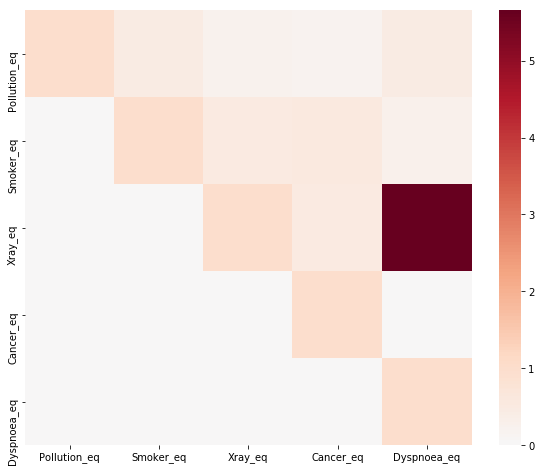

In [21]:
from profiler.utility import visualize_heatmap
visualize_heatmap(B)

In [12]:
pf.session.struct_engine.inv_cov

,Smoker_eq,Pollution_eq,Cancer_eq,Xray_eq,Dyspnoea_eq
Smoker_eq,0.000000,0.060068,0.028941,0.121465,0.114307
Pollution_eq,0.060068,0.000000,0.190729,0.068638,0.051160
Cancer_eq,0.028941,0.190729,0.000000,1.507218,0.246312
Xray_eq,0.121465,0.068638,1.507218,0.000000,0.162828
Dyspnoea_eq,0.114307,0.051160,0.246312,0.162828,0.000000


In [33]:
r = rs[0]
for right in r[0][0]:
    lefts = r[0][0][right]
    score = pf.session.struct_engine.score(right, lefts)
    print("{} -> {} ({})".format(",".join(pf.session.struct_engine.idx_to_col.loc[lefts, 'col']), 
                                 pf.session.struct_engine.idx_to_col.loc[right, 'col'], 
                                 "%.4f"%score))

 -> Smoker_eq (0.2246)
Smoker_eq -> Pollution_eq (0.1228)
Smoker_eq,Pollution_eq -> Cancer_eq (0.0588)
Smoker_eq,Pollution_eq,Cancer_eq -> Xray_eq (0.1946)
Smoker_eq,Pollution_eq,Cancer_eq,Xray_eq -> Dyspnoea_eq (0.2248)


In [37]:
r = rs[0]
for right in r[0][0]:
    lefts = r[0][0][right]
    for left in lefts:
        score = pf.session.struct_engine.score(right, [left])
        print("{} -> {} ({})".format(pf.session.struct_engine.idx_to_col.loc[left, 'col'], 
                                     pf.session.struct_engine.idx_to_col.loc[right, 'col'], 
                                     "%.4f"%score))

Smoker_eq -> Pollution_eq (0.1228)
Smoker_eq -> Cancer_eq (0.0588)
Pollution_eq -> Cancer_eq (0.0588)
Smoker_eq -> Xray_eq (0.2007)
Pollution_eq -> Xray_eq (0.2008)
Cancer_eq -> Xray_eq (0.1949)
Smoker_eq -> Dyspnoea_eq (0.2256)
Pollution_eq -> Dyspnoea_eq (0.2258)
Cancer_eq -> Dyspnoea_eq (0.2255)
Xray_eq -> Dyspnoea_eq (0.2255)
